In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
from matplotlib import cm

import sklearn
from sklearn import metrics, datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm 
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score,silhouette_samples

import scipy.cluster.hierarchy as shc
from scipy.cluster.vq import kmeans2, whiten

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=7,5

Dans ce projet, nous allons classer des chiffres manuscrits en exploitant l’algorithme des K-moyennes
sur "Optical Recognition of Handwritten Digits" DataSet.

# Présentation des données

Tout d'abord, nous avons notre ensemble de données dans cette structure : 

In [3]:
training=pd.read_csv("optdigits.tra",header=None)
training.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
training.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Nous pouvons voir qu'il y a un total de 65 colonnes, dont les 64 premières colonnes sont les nombres de pixels comptés dans chaque bloc, c'est-à-dire les features. Et la dernière colonne est l'étiquette, qui est le nombre qu'elle représente véritablement.

Nous choisissons les six premières lignes et les dessinons en niveaux de gris :

In [5]:
X=training.drop(64,axis=1)
y=training.iloc[:,-1]

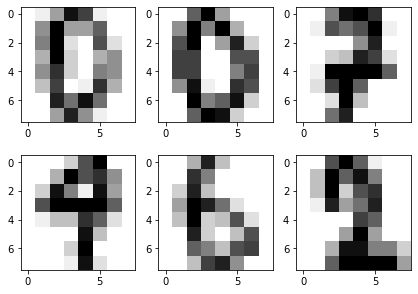

In [6]:
for i in range(6):
    plt.subplot(2,3,i+1)
    d=X.iloc[i].to_numpy()
    d.shape=(8,8)
    plt.imshow(255-d,cmap='gray')

# K-Means

## Apprentissage

Nons allons faire un k-moyennes avec K=10 sur la base d’apprentissage en visualisant l’erreur de quantification au fil des itérations. Ici, nous faisons varier le nombre d'itérations de 1 à 30 :

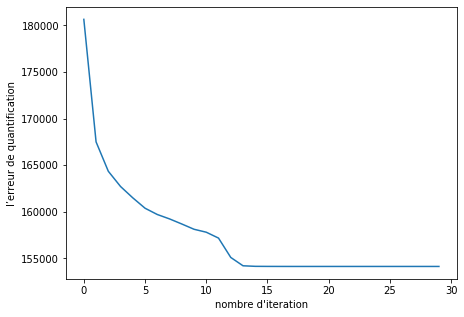

In [7]:
import warnings
warnings.filterwarnings('ignore')

df=whiten(X)
precedents_centoirds, closest_centroids = kmeans2(df,k=10,iter=1,minit='points')
err=[]

for iter in range(30):
    distance=np.sum(np.square(df-precedents_centoirds[closest_centroids]))
    err.append(distance)
    precedents_centoirds, closest_centroids = kmeans2(df,k=precedents_centoirds,iter=1,minit='points')

plt.plot(range(30),err)
plt.xlabel('nombre d\'iteration')
plt.ylabel('l’erreur de quantification')
plt.show()

Après avoir obtenu les résultats de 10 clusters, nous voulons aussi voir les fréquences de chaque classe.

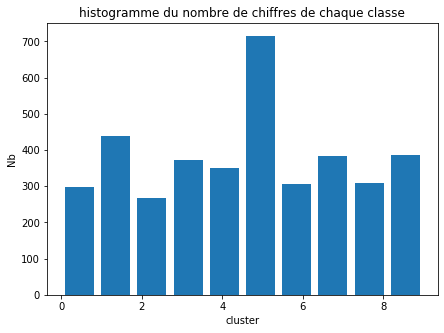

In [8]:
KM_train=KMeans(n_clusters=10,random_state=123)
KM_train.fit(X)

plt.hist(KM_train.labels_,histtype='bar',rwidth=0.8)
plt.xlabel('cluster')
plt.ylabel('Nb')
plt.title('histogramme du nombre de chiffres de chaque classe')
plt.show()

D'après l'histogramme ci-dessus, nous pouvons voir que les confusions les plus fréquentes sont celles du 5 suivie de celle du 1. Mais le numéro des classes n'est pas exactement le chiffre qu'elles représentent. Donc, d'après l'ordre donné par k-means, nous choisissons aléatoirement 10 données dans chaque classe et les dessinons. Ça nous permet de voir plus clairement ce qui se passe avec chaque classe.

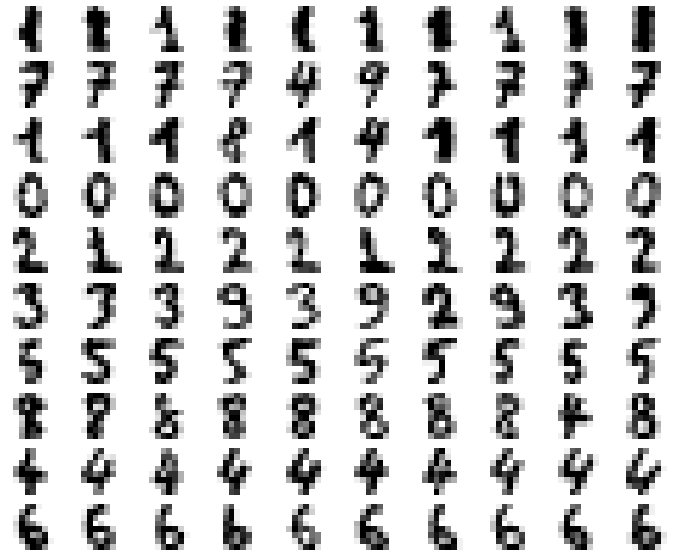

In [9]:
plt.rcParams['figure.figsize'] = (12, 10)
for c in range(KM_train.n_clusters):
    x=X[KM_train.labels_==c].sample(10,replace=False)
    for i in range(10):
        plt.subplot(10,10,c*10+i+1)
        d=x.iloc[i].to_numpy()
        d.shape=(8,8)
        plt.imshow(255-d,cmap='gray')
        plt.axis('off')

Comme ça, nous pouvons voir que la classe 5, qui est la plus fréquente, a un résultat de clustering moins qu'idéal parce qu'elle comprend en fait 4 valeurs différentes qui sont (3, 5, 8, 9) dans les 10 échantillons que nous avons choisis. Après pour la deuxième calsse la plus fréquente qui est la classe 1, bien que d'autres chiffres se mélangent parfois, leur proportion globale n'est pas grande.

Ensuite, nous allons faire un graphe d'indices de la silhoutte avec le nombre de clustering = 10:

Silhouette score when cluster number set to 10: 0.191


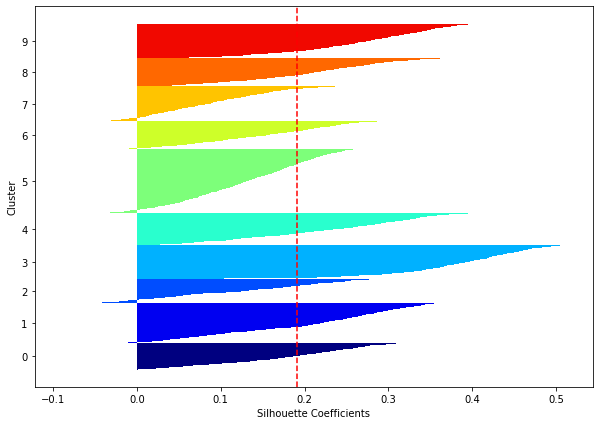

In [10]:
# Silhouette metric to evaluate model performance
# Set cluster=10
plt.figure(figsize=(10, 7))
y_km=KM_train.fit_predict(X)

cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_score_cluster_10=silhouette_score(X,KM_train.labels_)
print("Silhouette score when cluster number set to 10: %.3f" % silhouette_score_cluster_10)
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower,y_ax_upper=0,0
yticks=[]
for i,c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper+=len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.0)
    y_ax_lower+=len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks,cluster_labels)
plt.ylabel("Cluster")
plt.xlabel("Silhouette Coefficients")
plt.show()

Nous pouvons voir que la classe 3 qui représente le chiffre "0" a une indice de la silhouette la plus élevée, après c'est la classe 9 qui représente "6". Par contre, la classe 5, 2 et 7 ont des scores moins bon que les autres. Nous n'avons pas obtenu de résultats idéaux pour ces classes, car la différence entre ces nombres ne peut pas être très bien mesurée avec la distance euclidienne.

Après, nous calculons les moyennes des indices de la silhouette en modifiant le nombre de clustering de 10 à 15:

In [11]:
range_n_clusters = list(range(10,16))
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=123)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

For n_clusters = 10 The average silhouette_score is : 0.19148668442574007
For n_clusters = 11 The average silhouette_score is : 0.18814571462821522
For n_clusters = 12 The average silhouette_score is : 0.18911413156683488
For n_clusters = 13 The average silhouette_score is : 0.19042192976980854
For n_clusters = 14 The average silhouette_score is : 0.18799230451057342
For n_clusters = 15 The average silhouette_score is : 0.1842921019677564


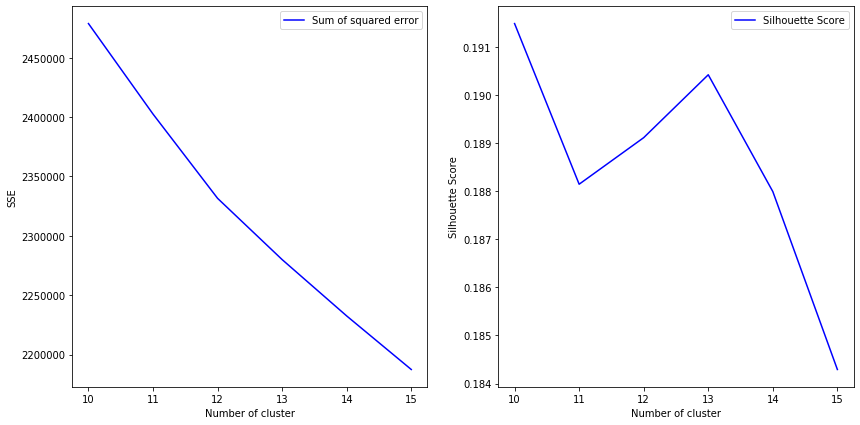

In [12]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Nous avons le meilleur indice de la silhouette lorsque k = 10, alors nous pouvons dire que c'est un bon clustering.

## Test

Après avoir formé le modèle sur l'ensemble d'apprentissage, nous utiliserons l'ensemble de test pour évaluer la performance du modèle.

Par cluster: il faut faire un vote à la majorité pour attribuer un label à chaque cluster (la classe la plus représentée dans chaque cluster).

In [13]:
labels=[]
for i in range(KM_train.n_clusters):
    label=y[KM_train.labels_==i].value_counts().index[0]
    labels.append(label)

print(labels)

[1, 7, 1, 0, 2, 3, 5, 8, 4, 6]


Mais, malheuresement, nous avons remarqué qu'il y avait deux classes avec la même étiquette : la classe 0 et la classe 2. Et pour mieux décider qui prend laquelle, nous faisons une table pour calculer les frèquences des chiffres dans ces deux classes : 

In [14]:
print("Classe 0:")
print(y[KM_train.labels_==0].value_counts())

print("Classe 2:")
print(y[KM_train.labels_==2].value_counts())

Classe 0:
1    247
8     31
7      7
4      6
6      3
9      2
3      2
Name: 64, dtype: int64
Classe 2:
1    115
9     97
4     30
8      6
7      6
5      6
3      5
0      1
Name: 64, dtype: int64


Ainsi, bien que nous ayons trouvé que la fréquence de "1" dans la classe 2 est très élevée, il y a beaucoup plus de 1 dans la classe 0. Et le nombre d'occurrences de "9" dans la classe 2 est légèrement inférieur par rapport au nombre de "1" mais reste très élevé et les autres classes ne peuvent pas représenter "9", donc nous déterminons que la classe 0 représente "1" et que la classe 2 représente "9".

In [15]:
labels[2]=9
labels

[1, 7, 9, 0, 2, 3, 5, 8, 4, 6]

Dessinons les données dans l'ordre des nouveaux labels que nous avons : 

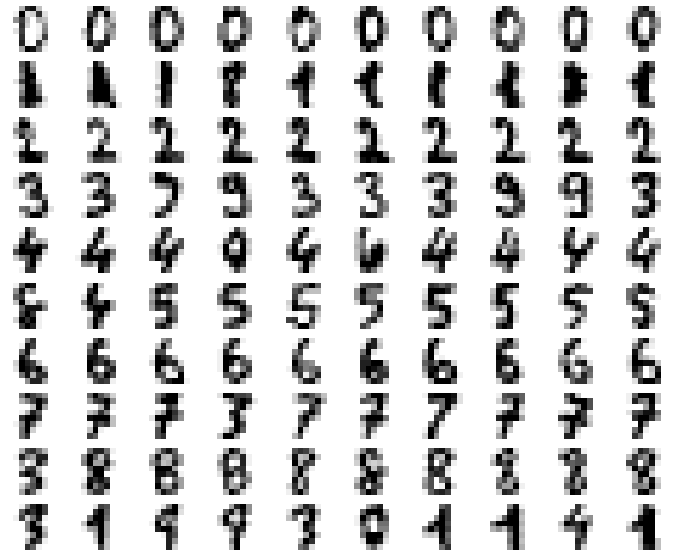

In [16]:
KM_train.labels_=np.choose(KM_train.labels_,labels).astype(np.int64)

plt.rcParams['figure.figsize'] = (12, 10)
for c in range(KM_train.n_clusters):
    x=X[KM_train.labels_==c].sample(10,replace=False)
    for i in range(10):
        plt.subplot(10,10,c*10+i+1)
        d=x.iloc[i].to_numpy()
        d.shape=(8,8)
        plt.imshow(255-d,cmap='gray')
        plt.axis('off')

In [17]:
testing=pd.read_csv("optdigits.tes",header=None)

X_test=testing.drop(64,axis=1)
y_test=testing.iloc[:,-1]

Pour chaque élément de la Base de Test nous allons :

1. chercher le Cluster (Centre) le plus proche
2. attribuer à cet élément de la BT le label associé au Cluster le plus proche

In [18]:
num_test=X_test.shape[0]
pre_test=np.zeros(num_test,dtype=y_test.dtype)

for i in range(num_test):
    distances=np.linalg.norm(X_test.iloc[i].to_numpy()-KM_train.cluster_centers_,axis=1)
    closest_cluster=np.argmin(distances)
    pre_test[i]=labels[closest_cluster]

Après, nous obtenons la matrice de confusions et la performance globale ci-dessous :

In [19]:
cm = confusion_matrix(y_test,pre_test,labels=range(10))

print("Confusion matrix")
print(cm)
print("Classification report")
print(classification_report(y_test,pre_test))

Confusion matrix
[[176   0   0   0   2   0   0   0   0   0]
 [  0 104  21   1   0   1   3   0   0  52]
 [  1   3 148   9   0   0   0   4  10   2]
 [  0   1   0 162   0   2   0  10   8   0]
 [  0   7   0   0 158   0   0   7   4   5]
 [  0   0   0  31   1 148   1   0   0   1]
 [  1   4   0   0   0   0 175   0   1   0]
 [  0   0   0   0   1   1   0 165   4   8]
 [  0  21   1  10   0   2   1   1 131   7]
 [  0   0   0 145   0   4   0   4   3  24]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.74      0.57      0.65       182
           2       0.87      0.84      0.85       177
           3       0.45      0.89      0.60       183
           4       0.98      0.87      0.92       181
           5       0.94      0.81      0.87       182
           6       0.97      0.97      0.97       181
           7       0.86      0.92      0.89       179
           8       0.81      0.75      0.78

D'après les résultats ci-dessus, nous pouvons voir que le taux de précision le plus élevé est celui de "0", le taux de précision et le taux de rappel atteignent 99%, suivis de "6" et de "4" qui ont également des taux de précision plus élevés. Cependant, comme les résultats de nos observations d'histogramme précédentes, le nombre 9 est facilement mal classé et sa précision n'est même pas de 50%.

Mais dans l'ensemble, la précision de notre modèle a atteint 77%, nous pouvons donc penser que notre modèle a une certaine efficacité.

# Clustering Hiérarchique

Dans les parties suivantes, nous allons implémenter la méthode Clustering Hiérarchique sur nos données.

Tout d'abord, nous voulons voir les performances des modèles avec un linkages différent :

In [20]:
for aff in ['single','complete','average','ward']:
    Hclustering=AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage=aff)
    Hclustering.fit(X)
    
    print("The accuracy score with linkage =",aff,"is: ",sm.accuracy_score(y,Hclustering.labels_))

The accuracy score with linkage = single is:  0.09835207951870259
The accuracy score with linkage = complete is:  0.06905571540674862
The accuracy score with linkage = average is:  0.01595605545383207
The accuracy score with linkage = ward is:  0.1998430551922574


Selon les résultats, nous pouvons noter que la précision avec le critère de Ward est beaucoup plus élevée que celle des autres critères.

## Apprentissage

Le dendrogramme du modèle avec le critère de Ward:

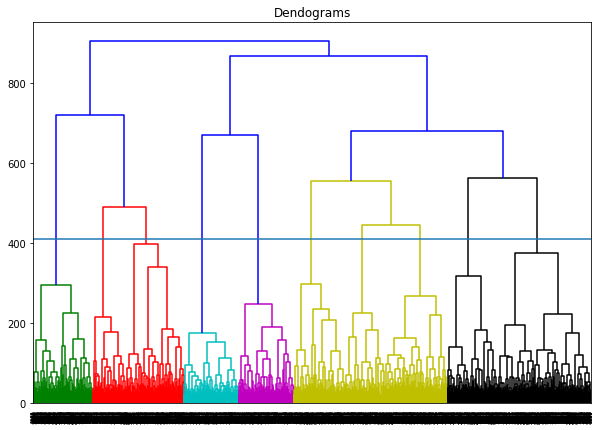

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=410)
plt.show()

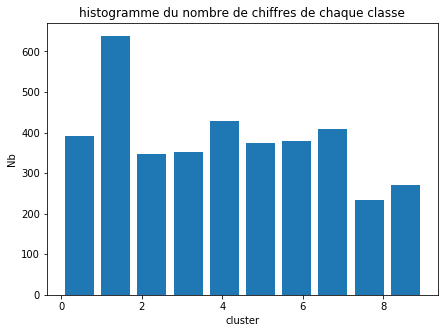

In [22]:
plt.figure(figsize=(7, 5))
plt.hist(Hclustering.labels_,histtype='bar',rwidth=0.8)
plt.xlabel('cluster')
plt.ylabel('Nb')
plt.title('histogramme du nombre de chiffres de chaque classe')
plt.show()

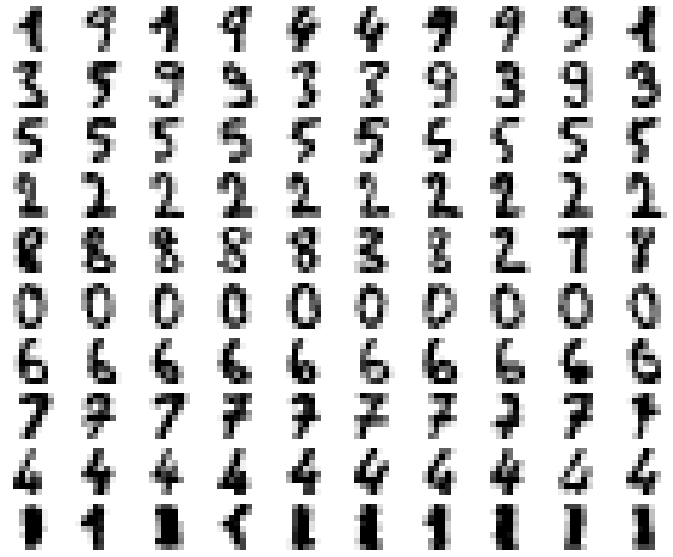

In [23]:
for c in range(Hclustering.n_clusters):
    x=X[Hclustering.labels_==c].sample(10,replace=False)
    for i in range(10):
        plt.subplot(10,10,c*10+i+1)
        d=x.iloc[i].to_numpy()
        d.shape=(8,8)
        plt.imshow(255-d,cmap='gray')
        plt.axis('off')

Semblable au résultat de K-Means, il existe également une classe contenant 3, 5, 9 à haute fréquence.

In [24]:
range_n_clusters = list(range(10,16))
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity='euclidean',linkage='ward')
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.1745470931891432
For n_clusters = 11 The average silhouette_score is : 0.17871212582446985
For n_clusters = 12 The average silhouette_score is : 0.17304962576959765
For n_clusters = 13 The average silhouette_score is : 0.17437624446800093
For n_clusters = 14 The average silhouette_score is : 0.17388412758382546
For n_clusters = 15 The average silhouette_score is : 0.16901128866557988


L'indice de la Silhouette pour la méthode de Clustering Hiérarchique est moins bon que celui de la méthode de K-Means qui est égal à 0.1915. De plus, nous avons constaté que l'indice de la Silhouette atteint une valeur maximale lorsque le nombre de classifications atteint 11. C'est-à-dire, si nous faisons un clustering de 11 classes, les classes seront mieux séparées l'un de l'autre.

## Test

De même, nous faisons un vote à la majorité pour attribuer un label à chaque cluster (la classe la plus représentée dans chaque cluster)

In [25]:
Hlabels=[]
for i in range(Hclustering.n_clusters):
    label=y[Hclustering.labels_==i].value_counts().index[0]
    Hlabels.append(label)

print(Hlabels)

[9, 3, 5, 2, 8, 0, 6, 7, 4, 1]


Et nous dessinons nos données dans l'ordre des nouveaux labels :

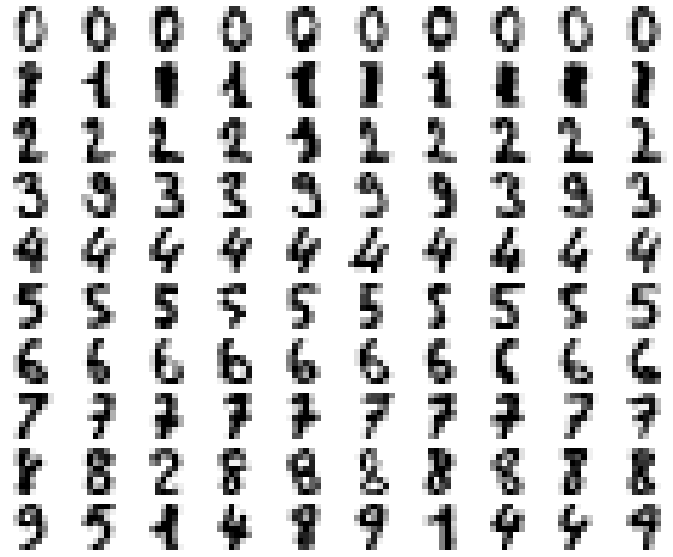

In [26]:
Hclustering.labels_=np.choose(Hclustering.labels_,Hlabels).astype(np.int64)

plt.rcParams['figure.figsize'] = (12, 10)
for c in range(Hclustering.n_clusters):
    x=X[Hclustering.labels_==c].sample(10,replace=False)
    for i in range(10):
        plt.subplot(10,10,c*10+i+1)
        d=x.iloc[i].to_numpy()
        d.shape=(8,8)
        plt.imshow(255-d,cmap='gray')
        plt.axis('off')

In [27]:
num_test=X_test.shape[0]
pre_test=np.zeros(num_test,dtype=y_test.dtype)

Hclustering.cluster_centers=np.array([X[Hclustering.labels_==i].to_numpy().mean(axis=0) for i in range(Hclustering.n_clusters)])

for i in range(num_test):
    distances=np.linalg.norm(X_test.iloc[i].to_numpy()-Hclustering.cluster_centers,axis=1)
    closest_cluster=np.argmin(distances)
    pre_test[i]=closest_cluster


cm = confusion_matrix(y_test,pre_test,labels=range(10))
print("Confusion matrix")
print(cm)
print("Classification report")
print(classification_report(y_test,pre_test))

Confusion matrix
[[176   0   0   0   2   0   0   0   0   0]
 [  0 105  24   0   0   1   2   0   0  50]
 [  1   3 141   7   0   0   0   2  22   1]
 [  0   1   0 162   0   2   0   9   9   0]
 [  0   4   0   0 127   0   3   3   5  39]
 [  0   0   0  13   1 166   1   0   0   1]
 [  1   3   0   0   1   1 175   0   0   0]
 [  0   0   0   0   0   0   0 156   2  21]
 [  0  18   1   4   0   1   1   1 137  11]
 [  0   0   0 143   0   2   0   3   4  28]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.78      0.58      0.66       182
           2       0.85      0.80      0.82       177
           3       0.49      0.89      0.63       183
           4       0.97      0.70      0.81       181
           5       0.96      0.91      0.94       182
           6       0.96      0.97      0.96       181
           7       0.90      0.87      0.88       179
           8       0.77      0.79      0.78

D'après les résultats ci-dessus, nous pouvons constater que, de même, le résultat de "0" est le meilleur, suivi de "6", de "5" et de "9" qui a le pire effet de classification. Le taux de précision globale a atteint 76%, ce qui n'est que légèrement pire que le résultat de K-Means.

Les deux modèles présentent des différences subtiles dans l'effet de classification de différents nombres, mais dans l'ensemble, l'effet n'est pas très différent.

## Comparaison de critères Ward et Single

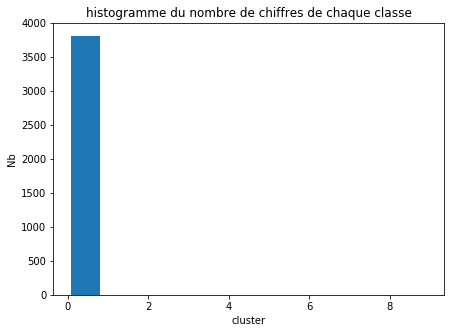

In [28]:
H_single=AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='single')
H_single.fit(X)

plt.figure(figsize=(7, 5))
plt.hist(H_single.labels_,histtype='bar',rwidth=0.8)
plt.xlabel('cluster')
plt.ylabel('Nb')
plt.title('histogramme du nombre de chiffres de chaque classe')
plt.show()

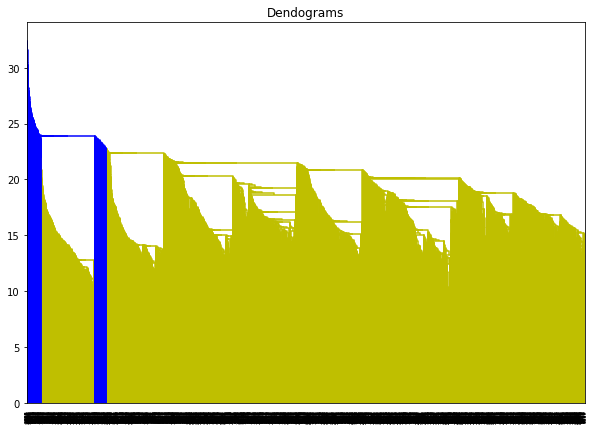

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.axhline(y=410)
plt.show()

D'après les résultats, nous pouvons voir que lorsque single est utilisé comme critère, nous ne pouvons pas du tout obtenir un bon résultat de clustering. Parce qu'il utilise à chaque fois la distance minimale entre deux classes comme distance entre les classes, il ne peut pas bien mesurer l'écart entre les groupes.